# Capstone 2 EDA: Cluster Analysis on Customer Behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Exploratory Data Analysis (EDA) Goals:

Data Understanding:
- Gain insights into the structure and composition of the dataset.
- Identify key features relevant to customer segmentation.

Visualization Techniques:
- Utilize histograms, bar plots, and box plots to understand the distribution of numerical and categorical variables.
- Create pair plots to visualize pairwise relationships between selected numerical variables.
- Generate correlation matrix heatmaps to identify correlations between variables.

Customer Segmentation Analysis:
- Evaluate the characteristics and behaviors of each customer segment.

# EDA

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date_Customer,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,2012-04-09,971
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2014-08-03,125
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,2013-08-21,472
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,2014-10-02,65
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,2014-01-19,321


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [89]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

For our first findings for the EDA part of this project, we will look at some general information.

In [3]:
print("Unique Birth Years from Year_Birth Column:",df["Year_Birth"].value_counts())

Unique Birth Years from Year_Birth Column: 1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64


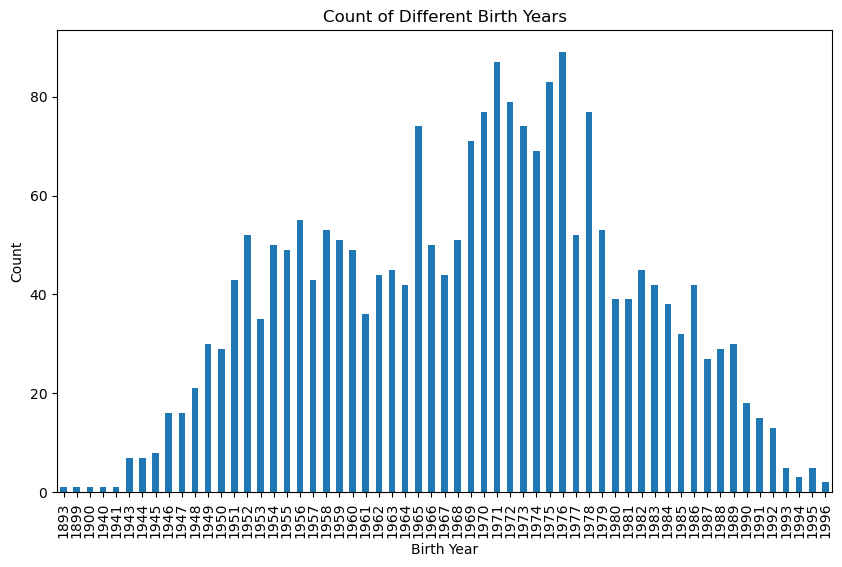

In [4]:
plt.figure(figsize=(10, 6))
df["Year_Birth"].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Different Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

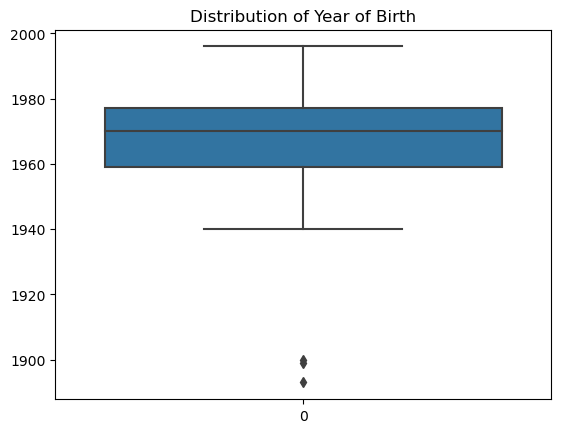

In [71]:
sns.boxplot(df['Year_Birth'])
plt.title('Distribution of Year of Birth')
plt.show()

In [72]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

The average birth year from this dataset is 1968

Martial Status Analysis:

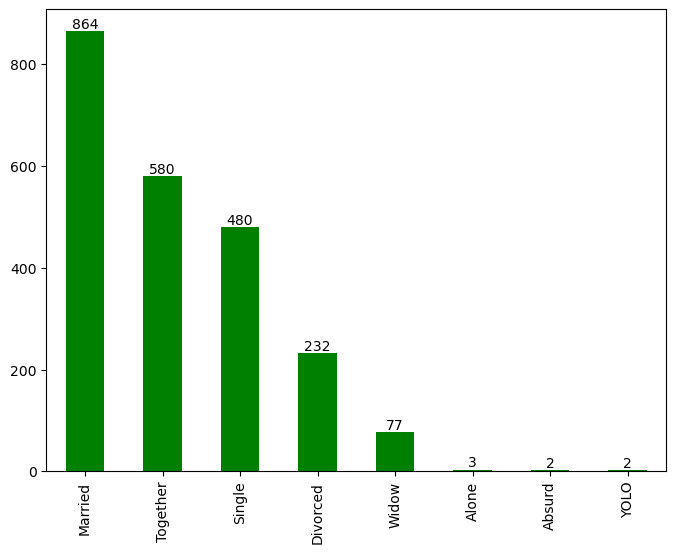

<Figure size 640x480 with 0 Axes>

In [94]:
plt.figure(figsize=(8, 6))
Marital_Status = df['Marital_Status'].value_counts()
ax = Marital_Status.plot(kind="bar", color="green")

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.show()
plt.savefig('Marital_Status.png')

In [5]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

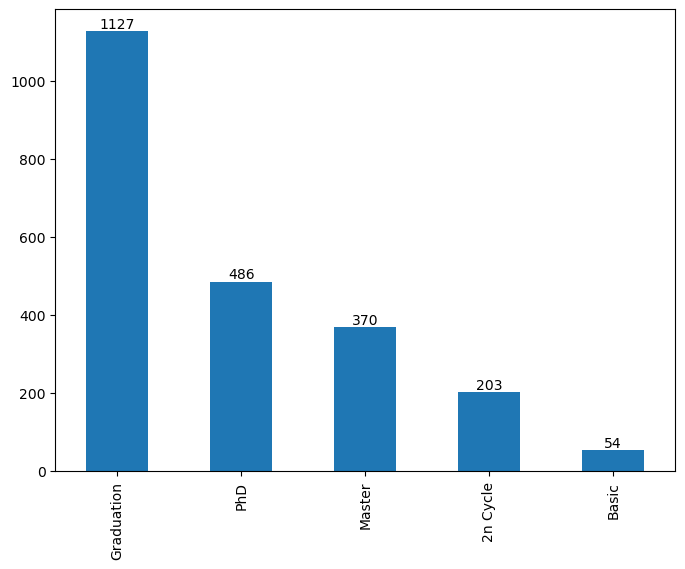

<Figure size 640x480 with 0 Axes>

In [95]:
household_education_counts = df['Education'].value_counts()

plt.figure(figsize=(8, 6))
ax = household_education_counts.plot(kind='bar')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.show()
plt.savefig('Education.png')

Analysis on Income of households:

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/653912361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"],color = 'green')


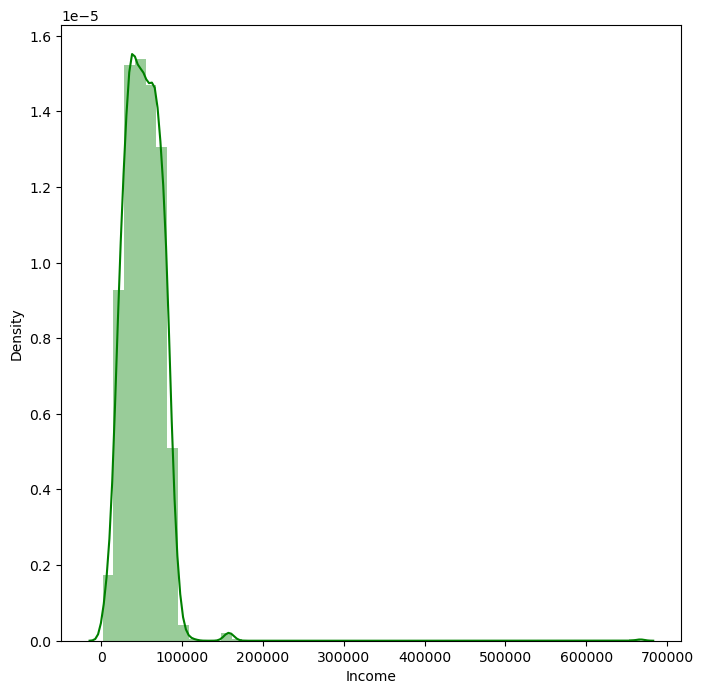

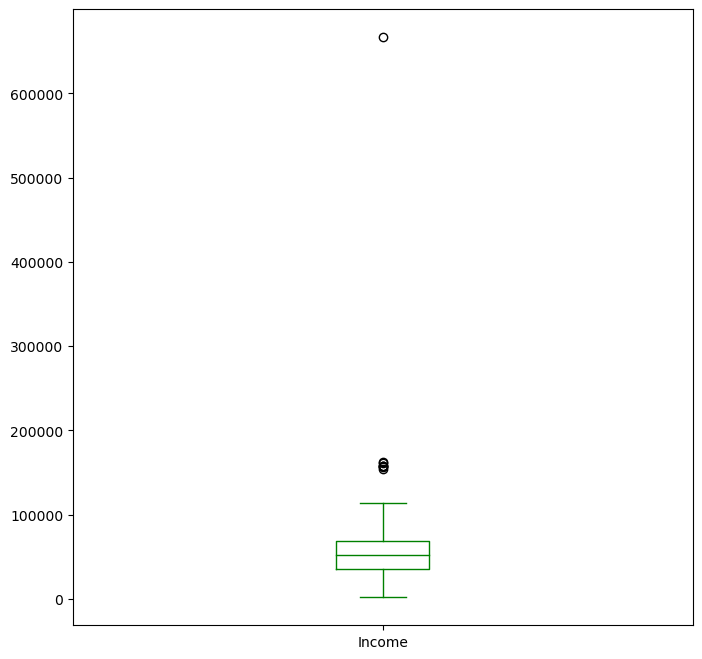

In [40]:
plt.figure(figsize=(8,8))
sns.distplot(df["Income"],color = 'green')
plt.show()
df["Income"].plot.box(figsize=(8,8),color = 'green')
plt.show()

We will take a look at income, but this time group average income by education levels.

In [ ]:
plt.distplot()

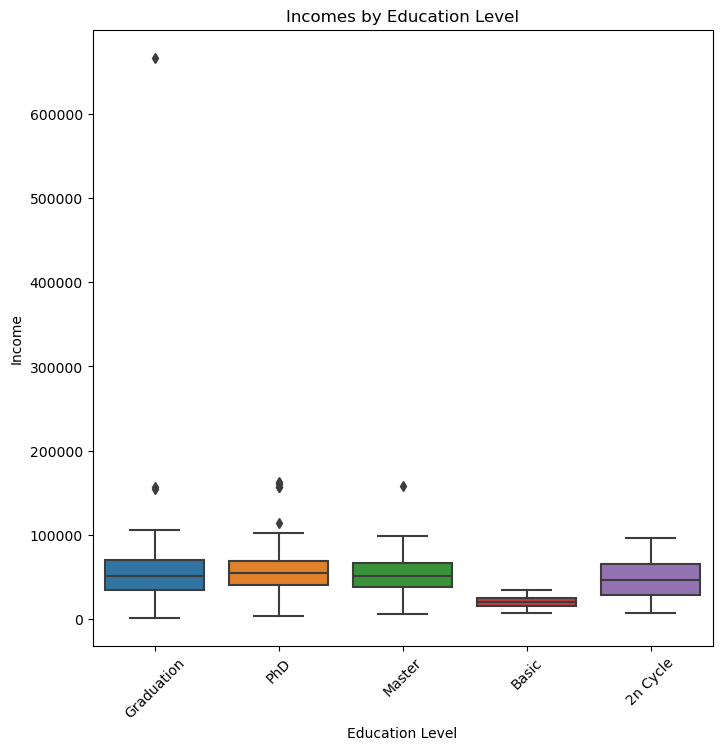

In [13]:
plt.figure(figsize=(8, 8))
sns.boxplot(x="Education", y="Income", data=df)
plt.title('Incomes by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

There is somone with over 600,000 in income. This may be considered an outlier, but we will leave it for now.

In [12]:
df[df['Income']>600000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date_Customer,Customer_For
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,3,11,0,2013-02-06,668


In [15]:
df['Income'].max()

666666.0

In [14]:
df['Income'].min()

1730.0

In [17]:
df['Income'].mean().round(2)

52237.98

On average, the income is 52,237. The highest income is at 666,666 and the lowest is at 1,730

Kidhome and Teenhome analysis:

In [26]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [27]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

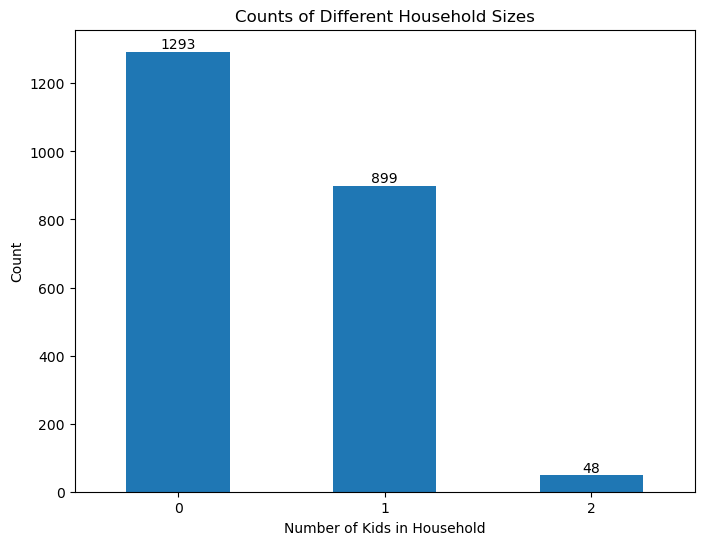

In [31]:
household_kid_counts = df['Kidhome'].value_counts()

plt.figure(figsize=(8, 6))
ax = household_kid_counts.plot(kind='bar')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Counts of Different Household Sizes')
plt.xlabel('Number of Kids in Household')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

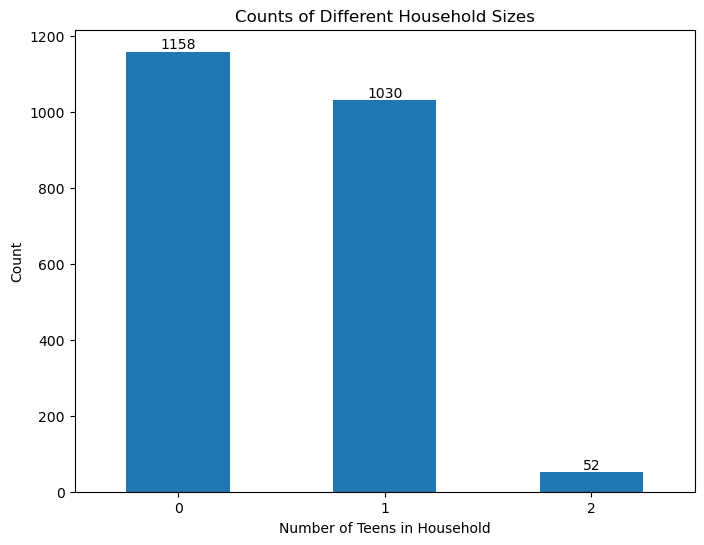

In [32]:
household_teen_counts = df['Teenhome'].value_counts()

plt.figure(figsize=(8, 6))
ax = household_teen_counts.plot(kind='bar')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Counts of Different Household Sizes')
plt.xlabel('Number of Teens in Household')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].value_counts()

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

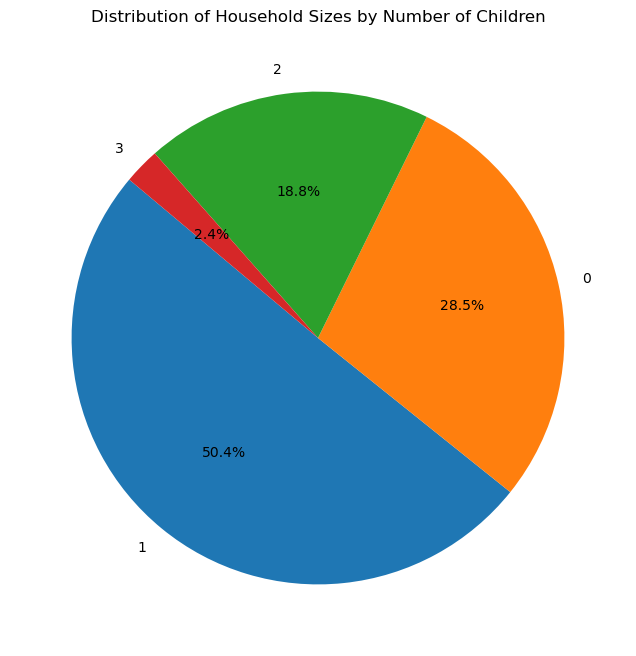

In [39]:
children_counts = df['Children'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Household Sizes by Number of Children')
plt.show()

Analysis on Foods:

In [43]:
unique_product_values = {}
for column in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    unique_product_values[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_product_values.items():
    print(f"Unique values in column '{column}': {values}")

Unique values in column 'MntWines': [ 635   11  426  173  520  235   76   14   28    5    6  194  233    3
 1006   53   84 1012    4   86    1  867  384  270   36  684    8  112
  110   96  482   40  702   55  437  421   13    9   81  123   48  826
  245  650   12  510  328  984  295  447  712  452  523  546  398   10
  688  247  856  496   25  258  565    2  721 1032  577   64  163   17
  130  292  350  135  230    7  445   15   27  505   51  207   41  386
  562  217  144  454  425 1332  527  490  378  547   47  320   34  722
  162  450   70  352  492  120  534  236  231  220  796    0  962  738
  399  614   32  598   73   42  346  888  997  212  536 1349 1001   20
   18  125  277   85   59 1149  847   29  152  620   35  356  783  466
   23  656  519  344  448  265  587  763   22   54 1170   72  613  224
  410  239  171 1076  182  824   30  377  155  897  131  297  787  792
  983  415  901  382  559  789 1218  925  864  960   16  168   45   24
  918  138  554  167  177   38  483   77 

To look at this in a more simpler way, we will create a temporary dataframe and column to see how the food expenses align.

In [44]:
df2 = df.copy()

df2['Expenses'] = df2['MntWines'] + df2['MntFruits'] + df2['MntMeatProducts'] + df2['MntFishProducts'] + df2['MntSweetProducts'] + df2['MntGoldProds']
df2['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/380319097.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2["Expenses"],color = 'red')


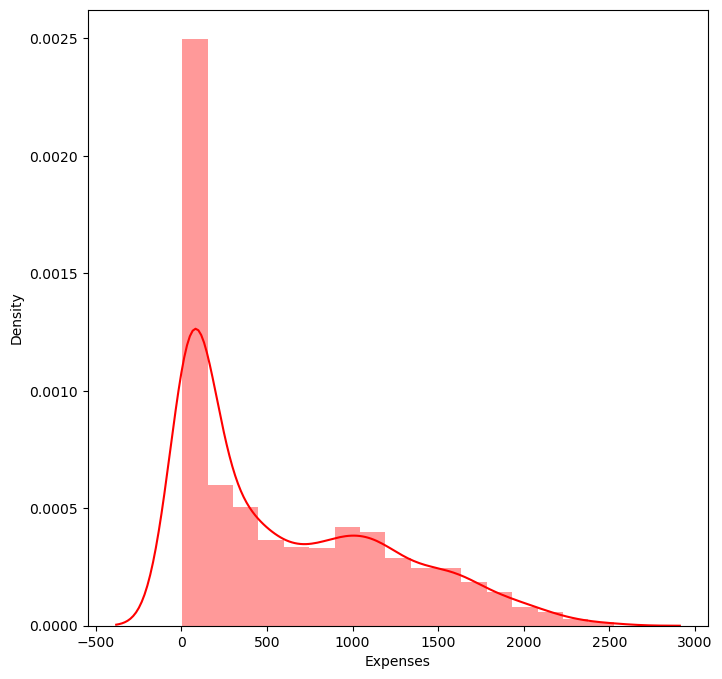

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(df2["Expenses"],color = 'red')
plt.show()

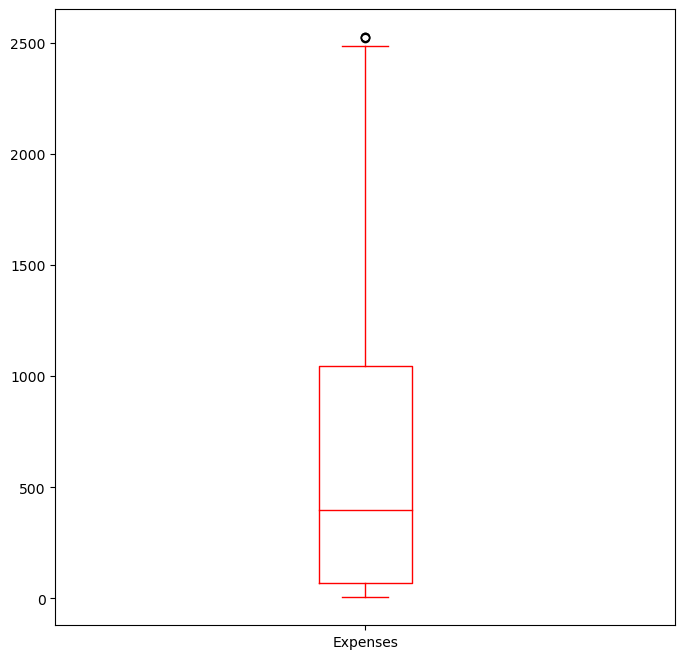

In [46]:
df2["Expenses"].plot.box(figsize=(8,8),color='red')
plt.show()

We will see a pairplot of the selected products in comparison to household Income. This pair plot visualizes the pairwise relationships between selected numerical variables from df. Each scatter plot in the pair plot represents the relationship between two variables, and histograms along the diagonal show the distribution of each variable individually.

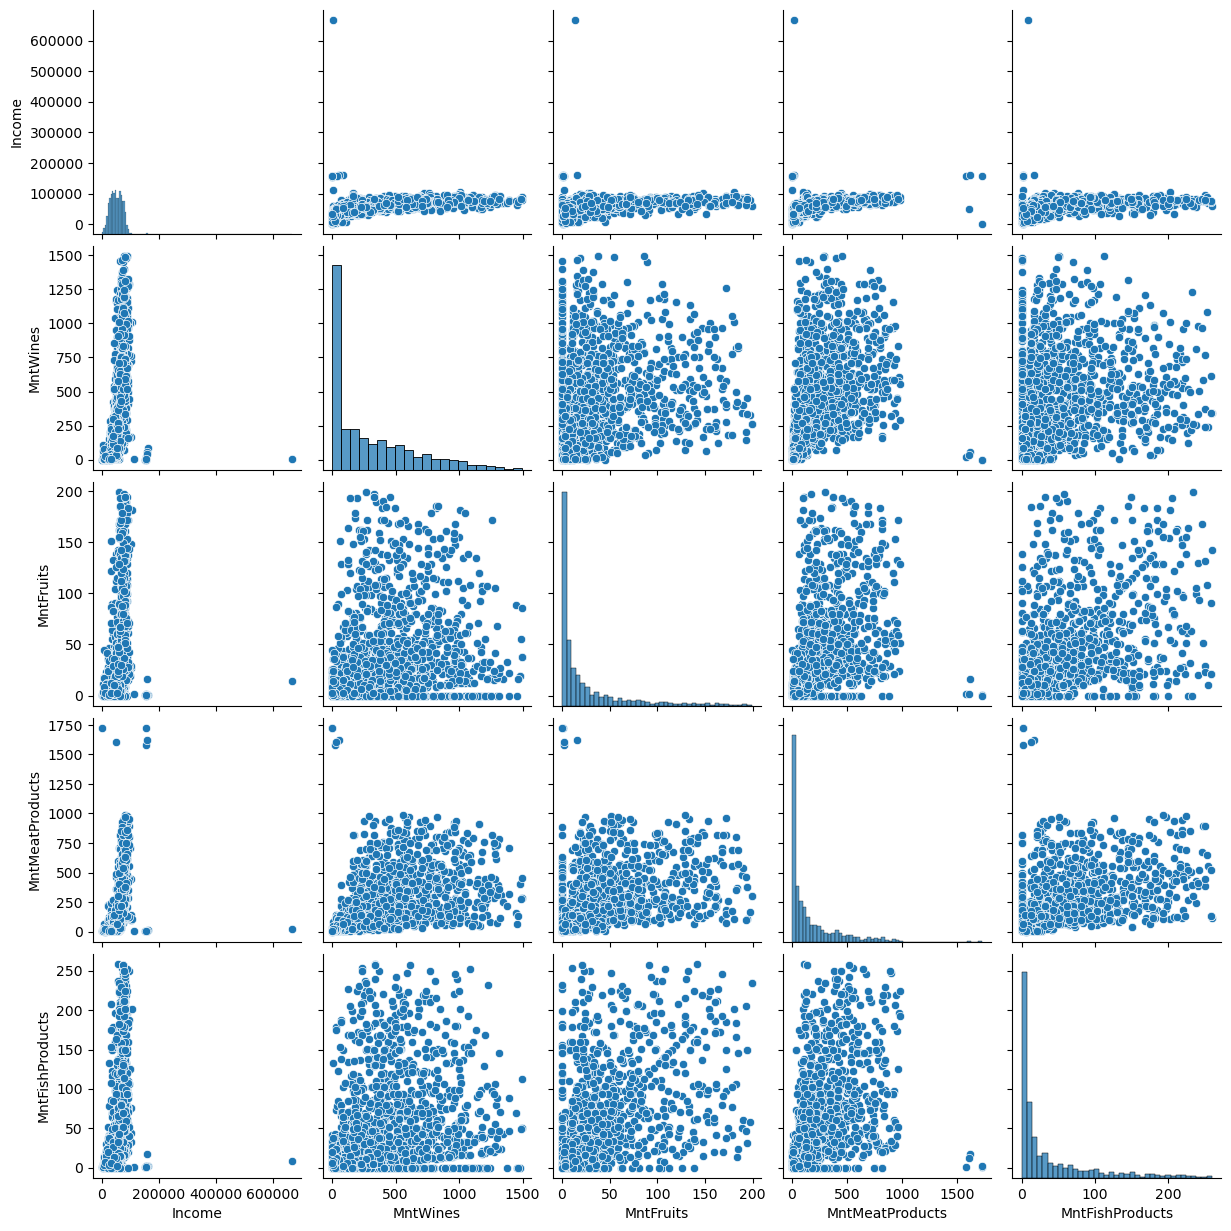

In [74]:
selected_columns = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts']
sns.pairplot(df[selected_columns])
plt.show()

Scatter plots: Each scatter plot shows the relationship between two variables. For instance, we can observe if there's a linear relationship between "Income" and "MntWines", "MntFruits", "MntMeatProducts", or "MntFishProducts".

Diagonal histograms: Along the diagonal, histograms show the distribution of each variable individually. This helps us understand the spread and central tendency of each variable.

Correlation: By observing the scatter plots and the correlation coefficients, we can assess the strength and direction of the relationships between variables. Strong positive correlations are indicated by points sloping upwards from left to right, while strong negative correlations slope downwards. Weak correlations will appear more scattered.

Lets check out another visulization however this time with Education.

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/3091944174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  education_products = df.groupby('Education').mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


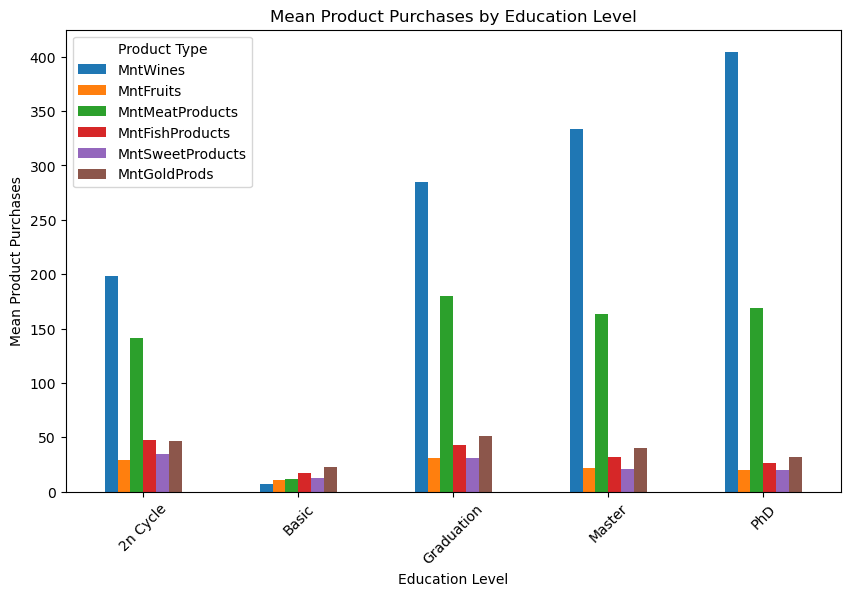

In [83]:
education_products = df.groupby('Education').mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

education_products.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Product Purchases by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Product Purchases')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.show()

Interesting. We can see that there is a trend when buying wine. People with higher educational history, they buy more wine. It is interesting to see that every other product is quite close. 

In [86]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/1042561063.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_products = df.groupby('Income_Group').mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


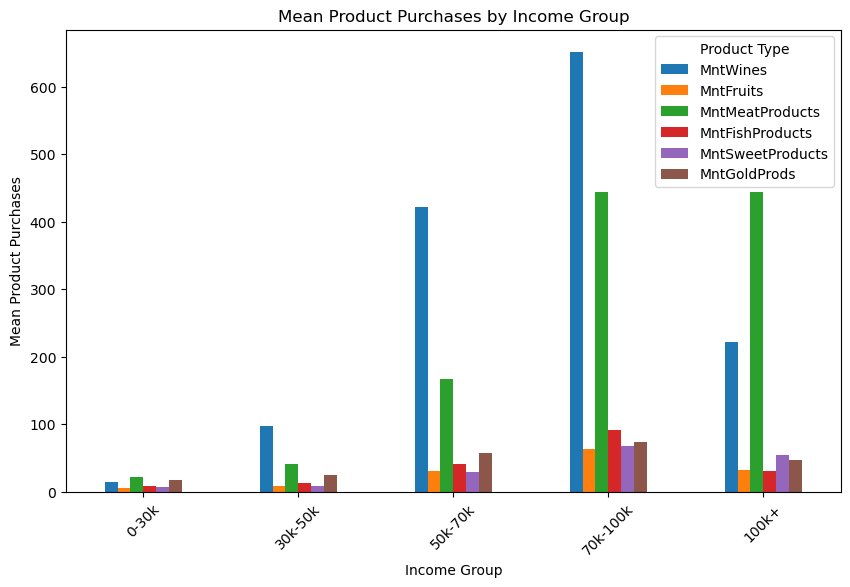

In [88]:
income_bins = [0, 30000, 50000, 70000, 100000, 700000]

# Income bins
income_labels = ['0-30k', '30k-50k', '50k-70k', '70k-100k', '100k+']

# Creating a new column with income bins
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)

# Grouping the data by income group and calculate the mean of product purchases
income_products = df.groupby('Income_Group').mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

income_products.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Product Purchases by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Mean Product Purchases')
plt.xticks(rotation=45)
plt.legend(title='Product Type')
plt.show()

We would maybe expect the graph to reach its peak at the 100k+ income bin, but that is not the case. On average, income levels of 70k-100k spend the most for these products.

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/1896656942.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  marital_status_products = df.groupby('Marital_Status').mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


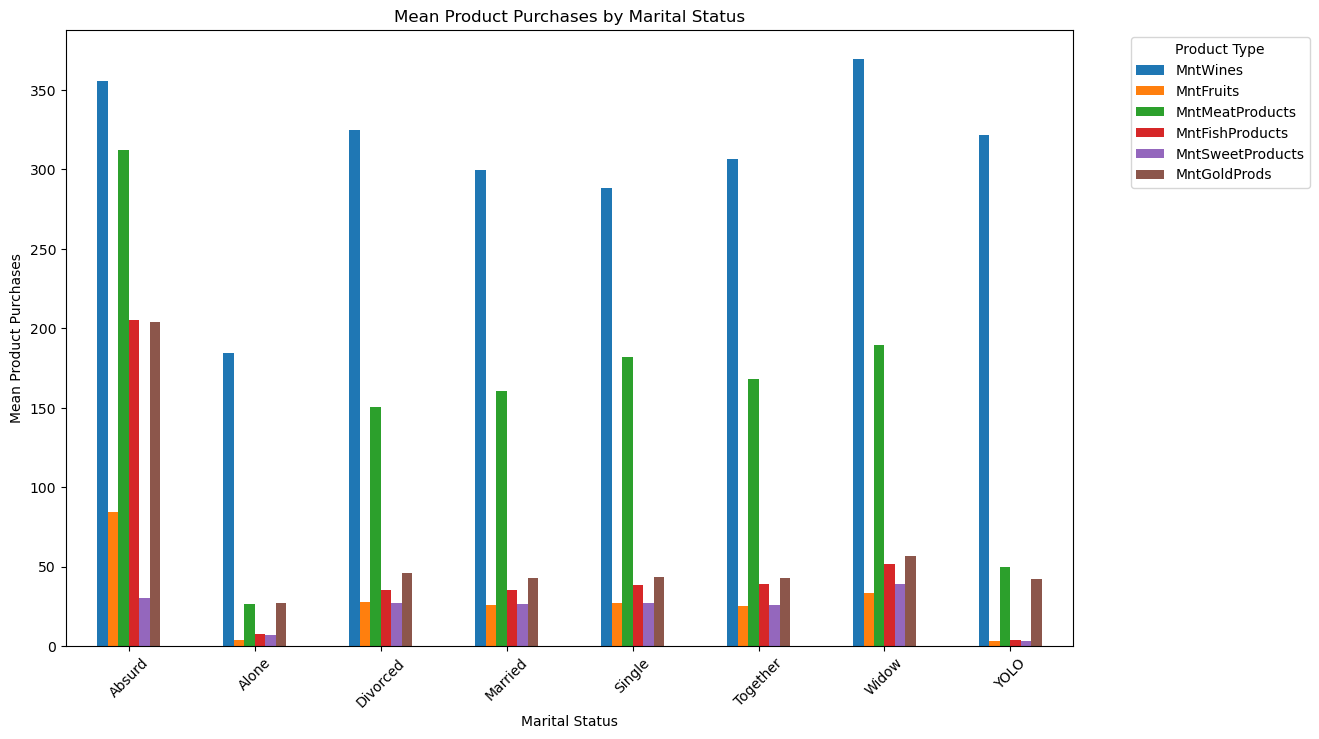

In [92]:
marital_status_products = df.groupby('Marital_Status').mean()[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

marital_status_products.plot(kind='bar', figsize=(13, 8))
plt.title('Mean Product Purchases by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Product Purchases')
plt.xticks(rotation=45)
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

When marital status states alone, the spending is the least on average where as the Absurd and Widow statuses have the highest spending.

Promotional Analyses:

In [47]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Date_Customer', 'Customer_For', 'Children'],
      dtype='object')

In [49]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [50]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

In [51]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [52]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

In [53]:
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

In [56]:
df2['Promotions'] = df2['AcceptedCmp1'] + df2['AcceptedCmp2'] + df2['AcceptedCmp3'] + df2['AcceptedCmp4'] + df2['AcceptedCmp5']
df2['Promotions'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: Promotions, dtype: int64

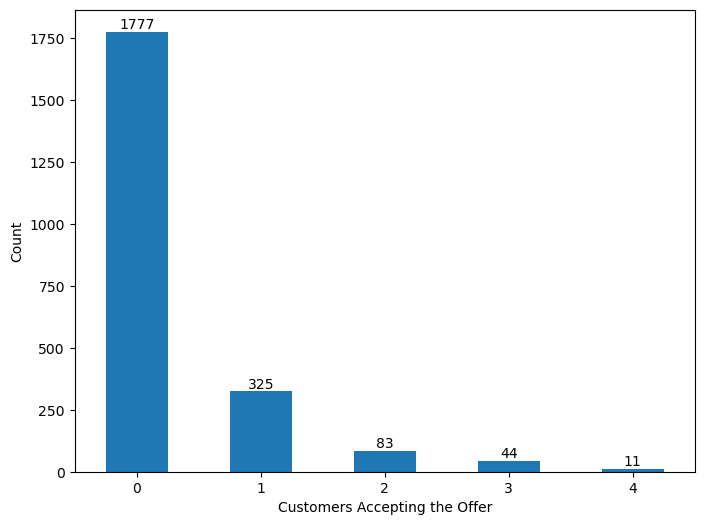

In [59]:
promotions_value_counts = df2['Promotions'].value_counts()

plt.figure(figsize=(8, 6))
ax = promotions_value_counts.plot(kind='bar')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.xlabel("Customers Accepting the Offer")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [60]:
df2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Date_Customer', 'Customer_For', 'Children', 'Expenses', 'Promotions'],
      dtype='object')

In [61]:
df2['Total_Purchases'] = df2['NumDealsPurchases'] + df2['NumWebPurchases'] + df2['NumCatalogPurchases'] + df2['NumStorePurchases'] + df2['NumWebVisitsMonth']
df2['Total_Purchases'].value_counts()

12    140
14    136
13    125
24    114
15    106
16    104
11    103
18     99
23     98
19     96
20     94
28     93
25     93
17     91
21     90
26     90
22     73
10     65
30     61
27     56
29     49
31     42
9      35
32     34
34     29
33     27
35     18
38     15
8      14
37     12
39      9
36      9
7       6
40      3
41      2
0       2
44      2
6       1
46      1
2       1
3       1
1       1
Name: Total_Purchases, dtype: int64

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/2677012809.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_purchases, color = 'red')


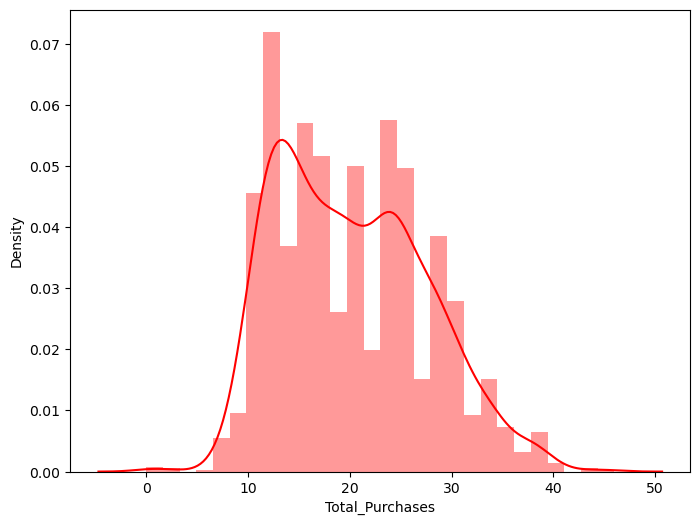

In [64]:
total_purchases = df2['Total_Purchases']

plt.figure(figsize=(8, 6))
sns.distplot(total_purchases, color = 'red')
plt.show()

Density in this context refers to the probability density function (PDF), which gives the probability of the variable (in this case, total purchases) falling within a particular range of values.

By visualizing the distribution of total purchases, we can observe the typical purchasing behavior of customers. The peak(s) in the distribution indicate the most common total purchase amounts, while the shape of the distribution provides insight into the variability and spread of total purchases across different customers.

With the following features analyzed, lets see a correlations amongst the features:

/var/folders/2r/qvwb_49162s3q75v3pr4d1x00000gn/T/ipykernel_3640/1691141492.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


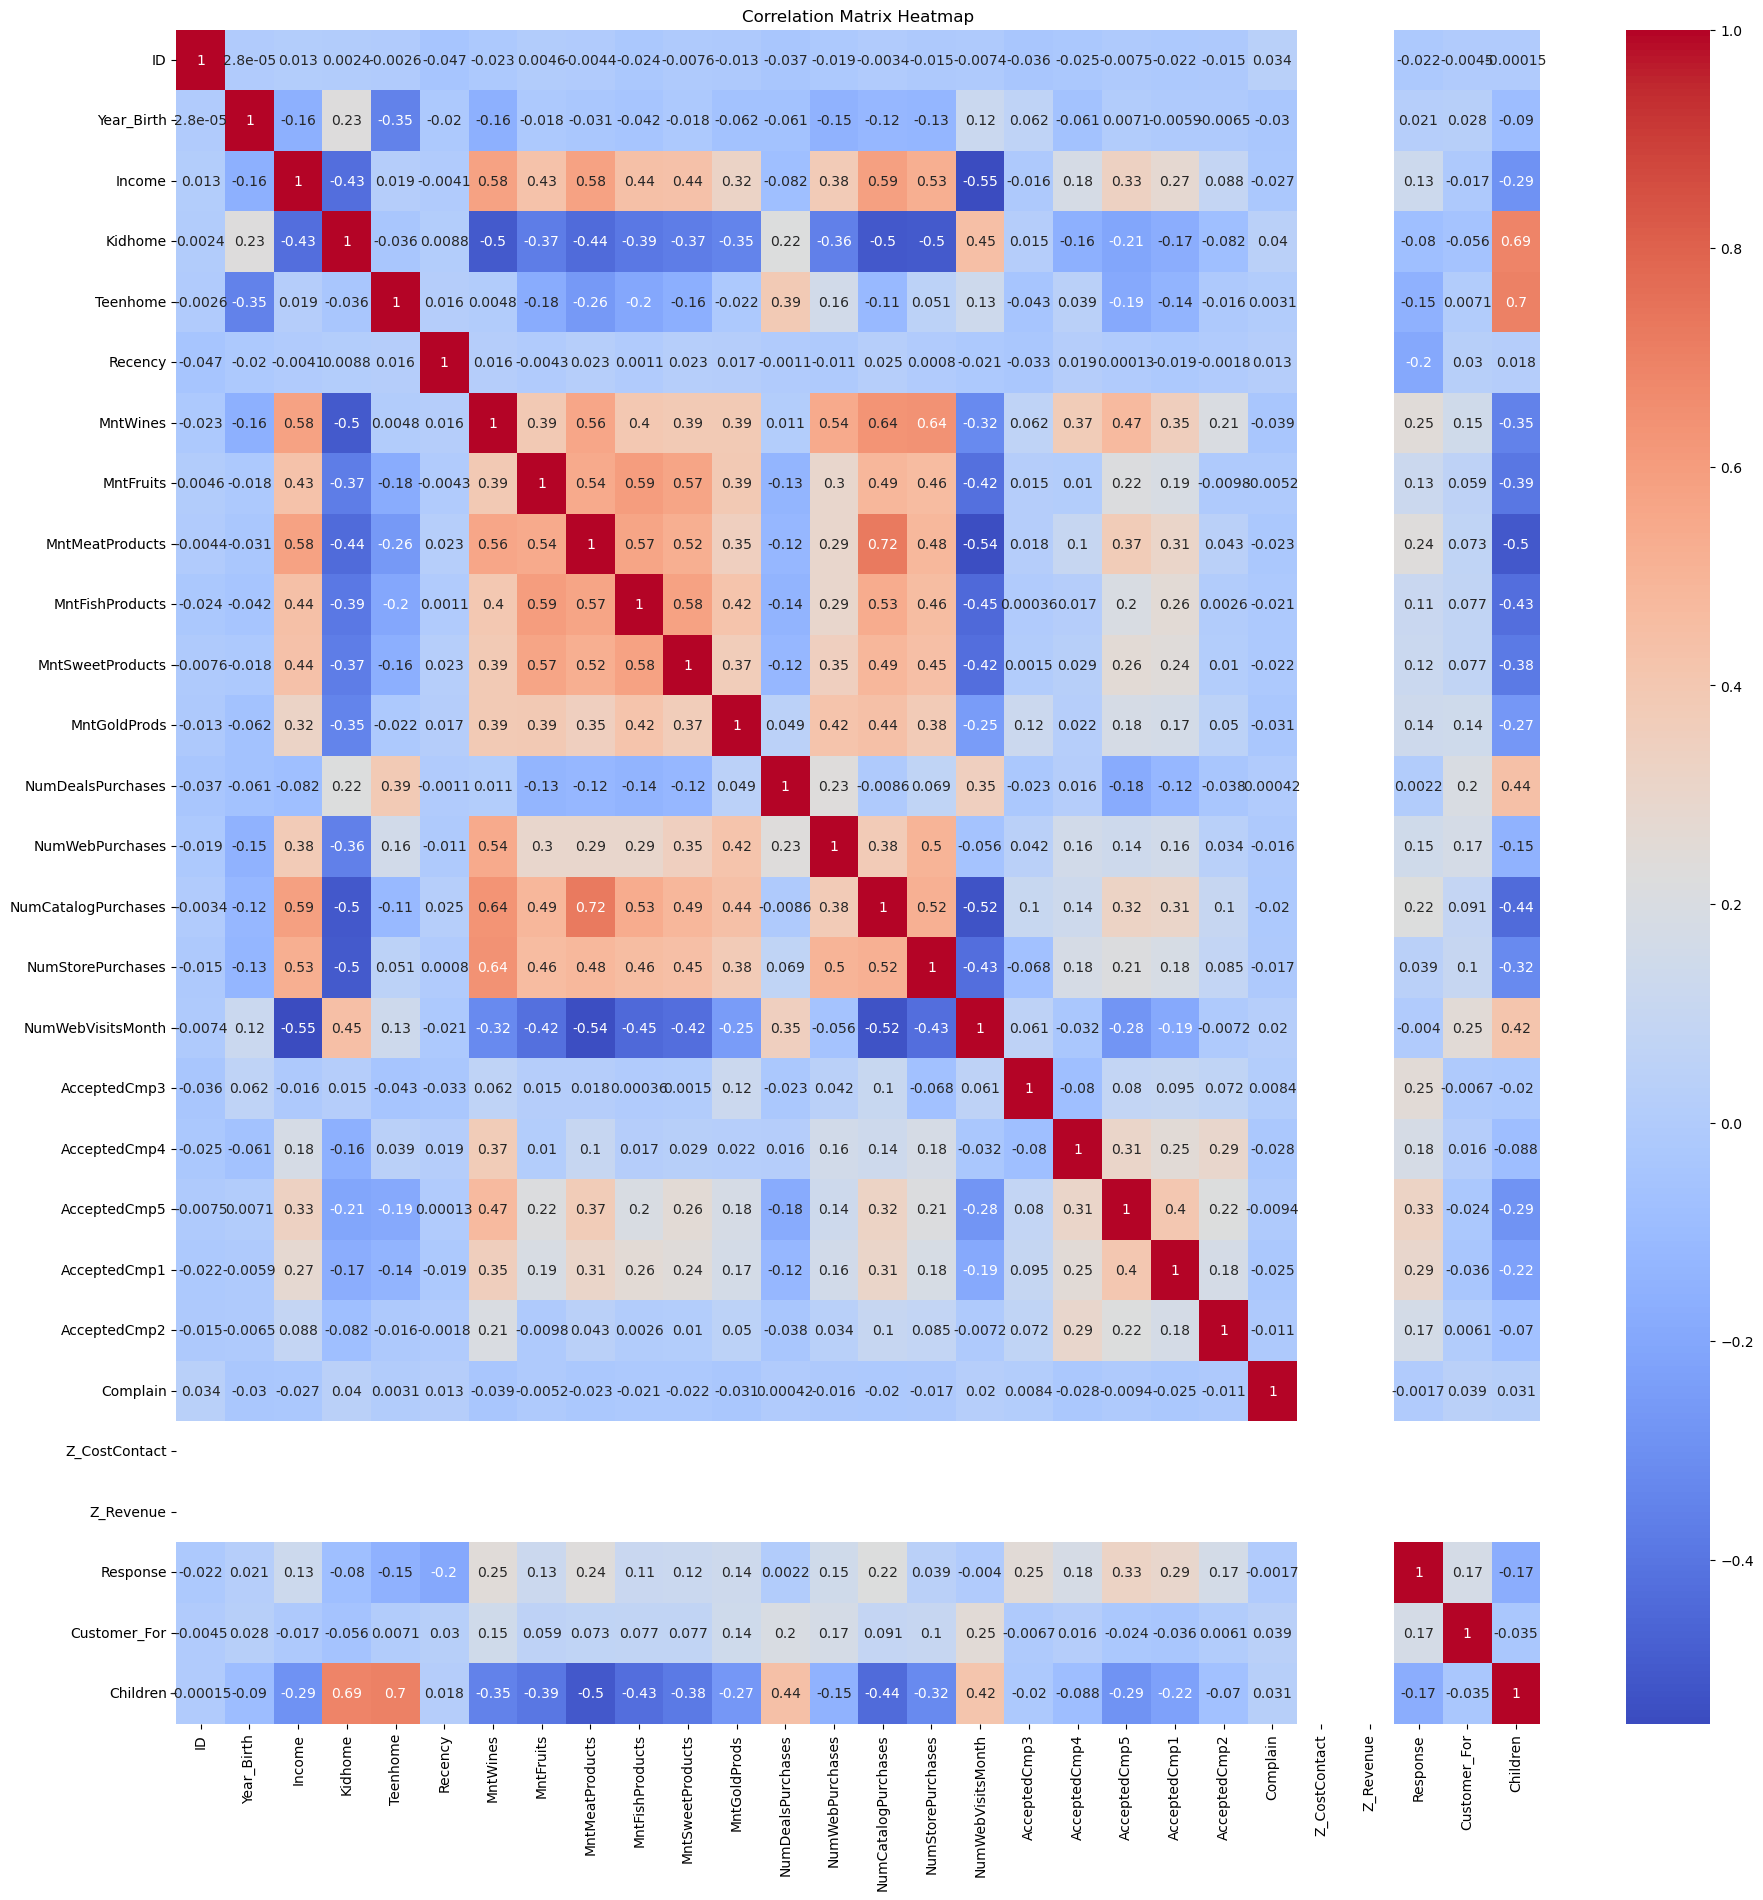

In [77]:
plt.figure(figsize=(22,22))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

No too columns are highly correlated, so we may not have to drop any observations.

We have a general idea of what data we are dealing with and the general trends and significance between features that our code has showed us.

The higher the education level, there is a trend that more products are pruchased. Same with income, the higher the household earns, the more they spend. However, we saw that households that earn between 70k-100k spend the most on the products.

In the next step, we will pre-process the dataset in order to go through the modeling process.

All in all, we will be leveraging unsupervised clustering techniques at the end. Thorough exploratory data analysis, this project aims to provide actionable insights for the groceries firm to enhance customer targeting and optimize business strategies. Effective customer segmentation facilitates personalized marketing approaches and strengthens customer relationships, ultimately driving business growth and profitability.

# Saving dataframe for preprocessing step:

In [93]:
df.to_csv('EDA.csv', index=False)